## Workshop 2: Data Visualization
*Saarang Panchavati and Abhinav Pottabathula*


Hello! Welcome to a brief workshop on data visualization. This one will cover the basics of data visualization using matplotlib and seaborn. After this, we'll move on to actually looking at EEG data!

In [1]:
#imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

***

### Matplotlib

matplotlib is the industry standard for plotting and data visualization, it is the engine that drives most data visualization libraries. Read the documentation [here](https://matplotlib.org/3.1.1/users/index.html)

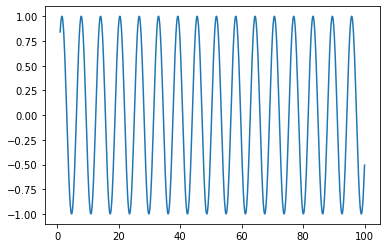

In [2]:
#lets make some data
x = np.linspace(1,100,1000) #generates 1000 points between 1 and 100
y = np.sin(x)

#now lets plot it! Look how easy it is
plt.plot(x,y); #plots x against y, as a line graph

In [3]:
mpg = sns.load_dataset('mpg') #load a miles per gallon dataset in pandas
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


Now you try! In the cell below, try plotting mpg vs horsepower using the above syntax! Notice that a linegraph doesn't really make much sense, and doesn't really give us a good sense of the data. 

Instead, we can change the code to `plt.scatter`. Try it in the cell below! Look how nice it looks now! We can really see some sort of trend in the data. 

Another useful function in matlab is the `hist` function. We can use it to explore distributions in the data for columns we choose. In the cell below, see what you can find about the distribution of horsepower in our dataset! Which way is the data skewed?

Now lets quickly look at some pandas stuff!

In [4]:
#Lets explore how the mean mpg changed over the years

#first we group our dataframe by years, and find the means (the agg function to use is np.mean)
grouped = #your code here!
plt.plot(grouped);

#we can add a title and some labels easily
plt.title('model_year vs. mpg')
plt.ylabel('mpg')
plt.xlabel('year');

SyntaxError: invalid syntax (<ipython-input-4-18ee05201aee>, line 4)

Matplotlib has a lot of other functionality! I'll briefly zoom over it in the cell next couple of cells below, but we won't spend too much time on it — it is fairly intuitive

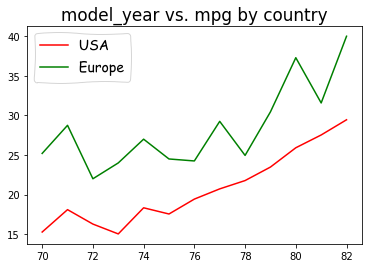

In [5]:
#plot multiple graphs on top of each other!
#Say we want to compare how the mpg of US cars has changed over the years to how the mpg of European cars has changed

#if you have any questions about the pandas stuff I do, let me know!
usdf = mpg[mpg['origin'] == 'usa'].groupby('model_year').agg(np.mean)['mpg']
eudf = mpg[mpg['origin'] == 'europe'].groupby('model_year').agg(np.mean)['mpg']

#all we need to do is just stack the plot commands, and add a label how nifty! 

#also you can change colors
plt.plot(usdf,'r',label = 'USA')
plt.plot(eudf,'g',label = 'Europe')

#also we can make them look like xkcd comics lol
plt.xkcd()

plt.title('model_year vs. mpg by country')
plt.legend(); #this shows the legend;

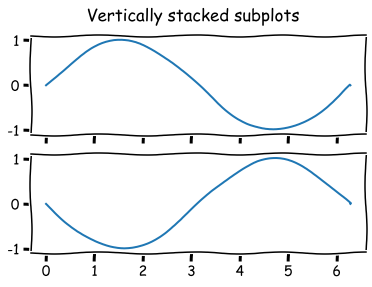

In [6]:
#Finally, matplot can be used to graph subplots like such 

x = np.linspace(0,2*np.pi,400)
y = np.sin(x)

fig, axs = plt.subplots(2,sharex = True) #we make them share the x axis
fig.suptitle('Vertically stacked subplots')
axs[0].plot(x, y)
axs[1].plot(x, -y);

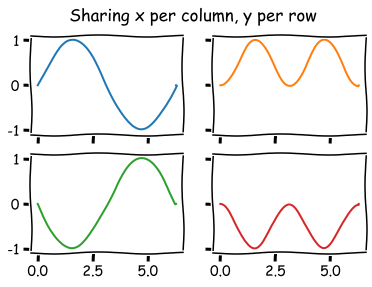

In [7]:
#Subplots in 2 directions 

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,sharex = True, sharey = True)
fig.suptitle('Sharing x per column, y per row')
ax1.plot(x, y)
ax2.plot(x, y**2, 'tab:orange')
ax3.plot(x, -y, 'tab:green')
ax4.plot(x, -y**2, 'tab:red')

***

### Seaborn

Seaborn is an extremely powerful library built on top of matplotlib, and is extremeley useful for data visualization and is much *much* prettier than matplotlib. 

Lets continue with some examples from the mpg dataset and compare them to seaborn

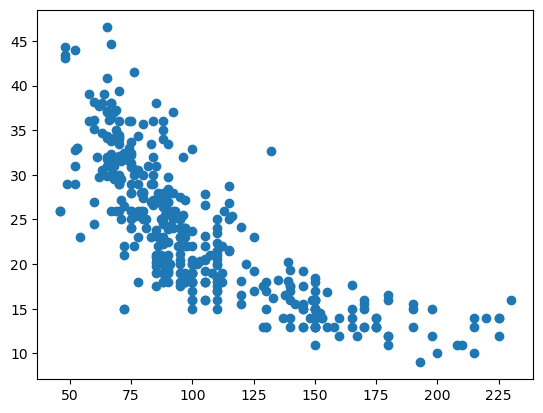

In [8]:
plt.rcdefaults()  #get rid of xkcd

#As a reminder, here's the scatterplot with matplotlib
plt.scatter(mpg['horsepower'],mpg['mpg']);

In [9]:
#Now lets see how nice this looks with seaborn
sns.relplot(x = 'horsepower',y = 'mpg',data = mpg)  
sns.relplot(x = 'horsepower',y = 'mpg',data = mpg, kind = 'line')  #the line parmeter changes it to a lineplot with confidence interval!
#notice that already it looks cleaner, and the syntax is much nicer and intuitive

AttributeError: module 'seaborn' has no attribute 'relplot'

In [10]:
#Now watch what else we can add to this with seaborn!
sns.scatterplot(x = 'horsepower',y = 'mpg',data = mpg, hue = 'origin', size = 'weight') 
#seaborn automatically classifies the data! WOW! 


AttributeError: module 'seaborn' has no attribute 'scatterplot'

In [11]:
#use this cell to play around more with the data and generate some dope plots




In [12]:
#Seaborn can even do pandas fucntions too like aggregating and groupby
titanic = sns.load_dataset("titanic")  
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [13]:
g = sns.catplot(x="class", hue="who", col="survived", data=titanic, kind="count")  

AttributeError: module 'seaborn' has no attribute 'catplot'

Hopefully that was a good overview of seaborn, of course if you have any questions always ask. You can look into all of the seaborn functions [here](https://www.c-sharpcorner.com/article/a-complete-python-seaborn-tutorial/)

***

# Now let's look at some EEG Data
## N170 - Face Recognition

<img style="height: 300px; float: right" src="https://www.researchgate.net/profile/Vincent_Walsh3/publication/49833438/figure/fig1/AS:394279194251295@1471014893499/The-P1-and-N170-ERP-components-The-graph-shows-the-grand-average-ERP-responses-from-ten.png"/>

The N170 is a large negative event-related potential (ERP) component that occurs after the detection of faces, but not objects, scrambled faces, or other body parts such as hands. The N170 occurs around 170ms after face perception and is most easily detected at lateral posterior electrodes such as T5 and T6 [1](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.601.6917&rep=rep1&type=pdf). Frontal or profile views of human (and animal [2](https://www.ncbi.nlm.nih.gov/pubmed/14995895)) faces elicit the strongest N170 and the strength of the N170 does not seem to be influenced by how familiar a face is. Thus, although there is no consensus on the specific source of the N170, researchers believe it is related to activity in the fusiform face area, an area of the brain that shows a similar response pattern and is involved in encoding the holistic representation of a face (i.e eyes, nose mouth all arranged in the appropriate way).

In this notebook, we will attempt to detect the N170 with the Muse headband using faces and houses as our stimuli. The Muse's temporal electrodes (TP9 and TP10) are well positioned to detect the N170 and we expect we'll be able to see an N170 emerge from just a few dozen trials. We will then run several different classification algorithms on our data in order to evaluate the performance of a potential brain-computer interface using the N170.

## Step 1: Prepare the Data for Analysis
 
Since last week we learned how to acquire and clean data, we will begin where we left off and start analyzing data. There is a folder under Workshop 2 called N170, and it contains sample data which we will be analyzing.

### Load data into MNE objects

[MNE](https://martinos.org/mne/stable/index.html) is a very powerful Python library for analyzing EEG data. It provides helpful functions for performing key tasks such as filtering EEG data, rejecting artifacts, and grouping EEG data into chunks (epochs).

The first step to using MNE is to read the data we've collected into an MNE `Raw` object

In [14]:
from utils import utils

# Define these parameters 
duration = 120 # in seconds. 120 is recommended
subject = 1 # unique id for each participant
session = 1 # represents a data collection session. Multiple trials can be performed for each session

raw = utils.load_data('/N170', sfreq=256., subject_nb=subject, session_nb=session)

Data Path:./data/N170/subject1/session1/*.csv
fnames: ['./data/N170/subject1/session1/data_2017-09-13-15.45.08.csv', './data/N170/subject1/session1/data_2017-09-13-15.40.17.csv', './data/N170/subject1/session1/data_2017-09-13-15.32.50.csv', './data/N170/subject1/session1/data_2017-09-13-15.30.01.csv', './data/N170/subject1/session1/data_2017-09-13-15.35.26.csv', './data/N170/subject1/session1/data_2017-09-13-15.42.33.csv']
Creating RawArray with float64 data, n_channels=5, n_times=30732
    Range : 0 ... 30731 =      0.000 ...   120.043 secs
Ready.
Creating RawArray with float64 data, n_channels=5, n_times=30732
    Range : 0 ... 30731 =      0.000 ...   120.043 secs
Ready.
Creating RawArray with float64 data, n_channels=5, n_times=30732
    Range : 0 ... 30731 =      0.000 ...   120.043 secs
Ready.
Creating RawArray with float64 data, n_channels=5, n_times=30732
    Range : 0 ... 30731 =      0.000 ...   120.043 secs
Ready.
Creating RawArray with float64 data, n_channels=5, n_times=30

### Visualizing the Power Spectrum

Plotting the power spectral density (PSD) of our dataset will give us a glimpse at the different frequencies that are present. We won't be able to see the N170 in the PSD, but it will give us an impression of how noisy our data was. A very noisy or flat PSD may represent poor signal quality at certain electrodes



Effective window size : 8.000 (s)


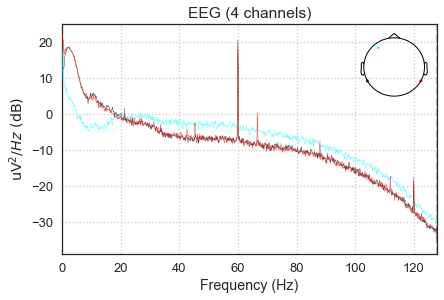

In [15]:
%matplotlib inline
raw.plot_psd();

This PSD looks good. There is a large peak at 60hz, representing background electrical activity.

### Filtering

Most ERP components are composed of lower frequency fluctuations in the EEG signal. Thus, we can filter out all frequencies between 1 and 30 hz in order to increase our ability to detect them.

Setting up band-pass filter from 1 - 30 Hz
Setting up band-pass filter from 1 - 30 Hz
Setting up band-pass filter from 1 - 30 Hz
Setting up band-pass filter from 1 - 30 Hz
Setting up band-pass filter from 1 - 30 Hz
Setting up band-pass filter from 1 - 30 Hz
Effective window size : 8.000 (s)


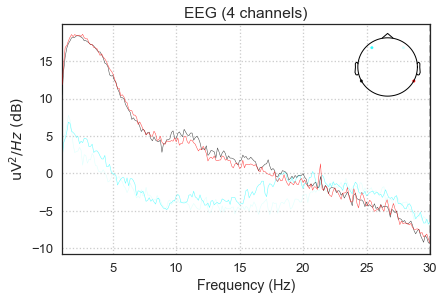

In [16]:
raw.filter(1,30, method='iir')
raw.plot_psd(fmin=1, fmax=30);

This PSD of frequencies between 1 and 30 hz looks good. The difference between the temporal channels (red and black) and the frontal channels (blue and green) is clearly evident. The huge peak from 1 to 3hz is largely due to the presence of eye blinks, which produce large amplitude, low-frequency events in the EEG.

### Epoching

Next, we will chunk (epoch) the data into segments representing the data 100ms before to 800ms after each stimulus. No baseline correction is needed (signal is bandpass filtered) and we will reject every epoch where the amplitude of the signal exceeded 75 uV, which should most eye blinks.

In [17]:
# Create an array containing the timestamps and type of each stimulus (i.e. face or house)
events = find_events(raw)
event_id = {'House': 1, 'Face': 2}

# Create an MNE Epochs object representing all the epochs around stimulus presentation
epochs = Epochs(raw, events=events, event_id=event_id, 
                tmin=-0.1, tmax=0.8, baseline=None,
                reject={'eeg': 75e-6}, preload=True, 
                verbose=False, picks=[0,1,2,3])
print('sample drop %: ', (1 - len(epochs.events)/len(events)) * 100)
epochs

NameError: name 'find_events' is not defined

Sample drop % is an important metric representing how noisy our data set was. If this is greater than 20%, consider ensuring that signal variances is very low in the raw EEG viewer and collecting more data

## Step 5: Analyze the Data

Finally, we can now analyze our results by averaging the epochs that occured during the different stimuli and looking for differences in the waveform


### Epoch average

With our `plot_conditions` utility function, we can plot the average ERP for all electrodes for both conditions:

In [18]:
%matplotlib inline
conditions = OrderedDict()
conditions['House'] = [1]
conditions['Face'] = [2]

fig, ax = utils.plot_conditions(epochs, conditions=conditions, 
                                ci=97.5, n_boot=1000, title='',
                                diff_waveform=(1, 2))

NameError: name 'OrderedDict' is not defined

Here we have a very nice deflection in the temporal channels around 200ms for face stimuli. This is likely the N170, although appearing slightly later due to delay in receiving the data over bluetooth. 

There's not much to see in the frontal channels (AF7 and AF8), but that's to be expected based on the fact that the N170 is mostly a lateral posterior brain phenomenon

### Decoding the N170

Next, we will use 4 different machine learning pipelines to classify the N170 based on the data we collected. The 

- **Vect + LR** :  Vectorization of the trial + Logistic Regression. This can be considered the standard decoding pipeline for MEG / EEG.
- **Vect + RegLDA** :  Vectorization of the trial + Regularized LDA. This one is very commonly used in P300 BCIs. It can outperform the previous one but become unusable if the number of dimension is too high.
- **ERPCov + TS**: ErpCovariance + Tangent space mapping. One of the most reliable Riemannian geometry-based pipeline.
- **ERPCov + MDM**: ErpCovariance + MDM. A very simple, yet effective (for low channel count), Riemannian geometry classifier.

Evaluation is done through cross-validation, with area-under-the-curve (AUC) as metric (AUC is probably the best metric for binary and unbalanced classification problem)

*Note: because we're doing machine learning here, the following cell may take a while to complete*

In [19]:
import pandas as pd
from sklearn.pipeline import make_pipeline

from mne.decoding import Vectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit

from pyriemann.estimation import ERPCovariances, XdawnCovariances
from pyriemann.tangentspace import TangentSpace
from pyriemann.classification import MDM

from collections import OrderedDict

clfs = OrderedDict()

clfs['Vect + LR'] = make_pipeline(Vectorizer(), StandardScaler(), LogisticRegression())
clfs['Vect + RegLDA'] = make_pipeline(Vectorizer(), LDA(shrinkage='auto', solver='eigen'))
clfs['ERPCov + TS'] = make_pipeline(ERPCovariances(estimator='oas'), TangentSpace(), LogisticRegression())
clfs['ERPCov + MDM'] = make_pipeline(ERPCovariances(estimator='oas'), MDM())
clfs['XdawnCov + TS'] = make_pipeline(XdawnCovariances(estimator='oas'), TangentSpace(), LogisticRegression())
clfs['XdawnCov + MDM'] = make_pipeline(XdawnCovariances(estimator='oas'), MDM())

# format data
epochs.pick_types(eeg=True)
X = epochs.get_data() * 1e6
times = epochs.times
y = epochs.events[:, -1]

# define cross validation 
cv = StratifiedShuffleSplit(n_splits=20, test_size=0.25, 
                            random_state=42)

# run cross validation for each pipeline
auc = []
methods = []
for m in clfs:
    print(m)
    try:
        
        res = cross_val_score(clfs[m], X, y==2, scoring='roc_auc', 
                              cv=cv, n_jobs=-1)
        auc.extend(res)
        methods.extend([m]*len(res))
    except:
        pass

/Users/apottaba/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


NameError: name 'epochs' is not defined

In [20]:
## Plot Decoding Results

import seaborn as sns
from matplotlib import pyplot as plt

    
results = pd.DataFrame(data=auc, columns=['AUC'])
results['Method'] = methods

fig = plt.figure(figsize=[8,4])
sns.barplot(data=results, x='AUC', y='Method')
plt.xlim(0.4, 0.9)
sns.despine()

NameError: name 'auc' is not defined

The best classifiers for this data set appear to be the ERPCov and XdawnCov with tangent space projection pipelines. AUC is around .7, which is good, but on the low end for being able to run a brain-computer interface.

## Step 6: Share your Data!

How did your experiment go? If you're excited by your results we'd love to see your data!

Follow the instructions on our [Contributions](https://github.com/NeuroTechX/eeg-notebooks/blob/master/CONTRIBUTING.md) page to make a pull request with your data and we'll review it to be added to the EEG notebooks project.